#  제6강

In [1]:
import pandas as pd
import numpy as np

In [2]:
###한글 폰트###
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager, rc

rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df10 = pd.read_csv("household_2019a.csv")

In [4]:
df20 = pd.read_csv("household_2020a.csv")

In [5]:
df11 = df10[['year', 'id', 'income']]

In [6]:
df21 = df20[['year', 'id', 'age', 'sex', 'income']]

In [7]:
df = pd.merge(df11, df21, on="id", how="inner")

In [8]:
df.tail(3)

,year_x,id,income_x,year_y,age,sex,income_y
13907,2019,994800261,35030,2020,57,1,15098
13908,2019,994800291,6983,2020,53,2,9114
13909,2019,995800261,10307,2020,44,1,7857


In [9]:
df1 = df.set_index('id')

In [10]:
df2 = df1[['sex', 'age', 'income_x', 'income_y']]

In [11]:
df2

,sex,age,income_x,income_y
id,,,,
10600141,1,66,5385,2695
10600211,1,69,2772,1563
10600221,2,25,1140,6014
10600241,2,83,803,851
10600271,1,56,8021,7264
...,...,...,...,...
993800291,1,42,5092,179
994800251,1,49,16070,15454
994800261,1,57,35030,15098


In [12]:
df3 = df2.copy()

In [13]:
df3.rename(columns = {'income_x':'income2019', 'income_y':'income2020'}, inplace=True)

In [14]:
df3.tail()

,sex,age,income2019,income2020
id,,,,
993800291,1,42,5092,179
994800251,1,49,16070,15454
994800261,1,57,35030,15098
994800291,2,53,6983,9114
995800261,1,44,10307,7857


In [15]:
df3['diff'] = df3['income2020'] - df3['income2019']
df3 = df3.reset_index(drop=True)

In [16]:
df3.head()

,sex,age,income2019,income2020,diff
0,1,66,5385,2695,-2690
1,1,69,2772,1563,-1209
2,2,25,1140,6014,4874
3,2,83,803,851,48
4,1,56,8021,7264,-757


In [17]:
data = pd.DataFrame(df3, columns=['income2019', 'income2020'])

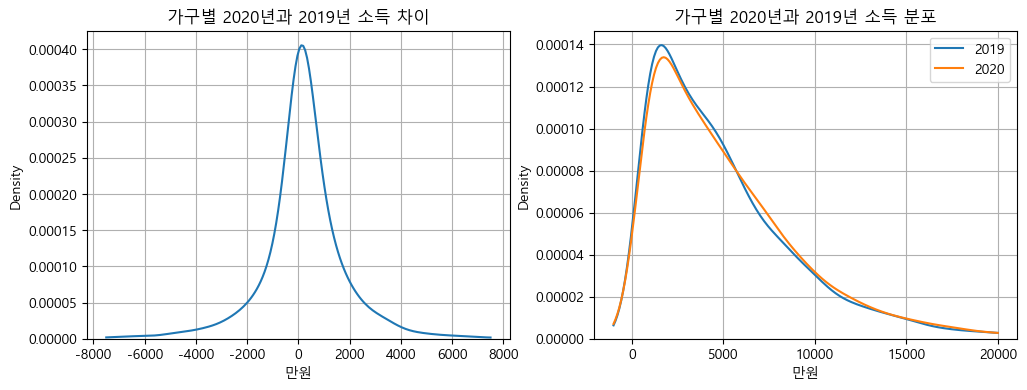

In [18]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams['axes.grid'] = True 

fig, axs = plt.subplots(1, 2)

axs[0].set_title("가구별 2020년과 2019년 소득 차이")
sns.kdeplot(df3['diff'], shade=False, clip=(-7500, 7500), ax=axs[0])  
axs[0].set_xlabel('만원')

axs[1].set_title("가구별 2020년과 2019년 소득 분포")
sns.kdeplot(df3['income2019'], shade=False, clip=(-1000, 20000), label="2019", ax=axs[1]) 
sns.kdeplot(df3['income2020'], shade=False, clip=(-1000, 20000), label="2020", ax=axs[1])  
axs[1].set_xlabel('만원')


plt.legend(loc="upper right")
plt.savefig("실습W0604A_동일가구소득차이히스토그램.png", dpi=150, bbox_inches='tight')
plt.show()

In [19]:
len(df3)

13910

In [20]:
mn = df3['diff'].mean()

In [21]:
std = df3['diff'].std()

In [22]:
mn

211.83803019410496

In [23]:
round(std,2)

2935.26

In [24]:
n = len(df3)

In [25]:
n

13910

In [26]:
se = std/np.sqrt(n)

In [27]:
se

24.88760561455631

In [28]:
z = mn/se

In [29]:
z.round(1)

8.5

In [30]:
import scipy as sp
import scipy.stats

In [31]:
rv = sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1, 표준정규분포

In [32]:
np.round(1-rv.cdf(z), 2)

0.0